In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [20]:

# # Load environmental and yield data
# env_data_2022 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2022_final.csv')
# env_data_2023 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2023_final.csv')

# # Load Desagri yield data from the .xls file
# desagri = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\desagri.csv')  # Replace with your file path

# # Merge dataframes on 'district' and date features
# # Ensure your monthly data has columns 'district', 'date' and other environmental factors
# env_data = pd.concat([env_data_2022, env_data_2023], axis=0)
# env_data['date'] = pd.to_datetime(env_data['date'], format='mixed')

# # Combine yield data for 2022-2023 with environmental data (assuming a yearly match)
# combined_data = pd.merge(env_data, desagri, on='district')

# # Data Preprocessing
# # Scale environmental features
# scaler = MinMaxScaler()
# scaled_features = scaler.fit_transform(combined_data.drop(['district', 'date', 'yield'], axis=1))

# # Prepare the dataset for time series (using a sliding window approach)
# def create_dataset(features, labels, time_steps=12):
#     X, y = [], []
#     for i in range(len(features) - time_steps):
#         X.append(features[i:i+time_steps])
#         y.append(labels[i + time_steps])
#     return np.array(X), np.array(y)

# # Convert data into time series format
# X, y = create_dataset(scaled_features, combined_data['yield'].values, time_steps=12)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# # Build the RNN-CNN Model
# model = Sequential()

# # CNN layers
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())

# # LSTM layers
# model.add(LSTM(64, return_sequences=True))
# model.add(LSTM(64))

# # Dense layers
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# # Plotting the Loss
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()

# # Predictions
# predictions = model.predict(X_test)

# # Plot Actual vs Predicted yield
# plt.plot(y_test, label='Actual')
# plt.plot(predictions, label='Predicted')
# plt.legend()
# plt.show()


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Load environmental and yield data
env_data_2022 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2022_final.csv')
env_data_2023 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2023_final.csv')

# Load Desagri yield data from the .xls file
desagri = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\desagri.csv')  # Replace with your file path


# Merge dataframes on 'district' and date features
# Ensure your monthly data has columns 'district', 'date' and other environmental factors
env_data = pd.concat([env_data_2022, env_data_2023], axis=0)
env_data['date'] = pd.to_datetime(env_data['date'], format='mixed')

# Combine environmental data with Desagri data based on district
# We'll assume we predict K-Yield (Kharif Yield) as an example here
combined_data = pd.merge(env_data, desagri, on='district')

# Data Preprocessing
# Drop unnecessary columns and scale environmental features
features = combined_data.drop(['district', 'date', 'uid',  'geometry', 'centroid', 'year', 'K-Area (Hectare)', 'R-Area (Hectare)','K-Production (Tonnes)','R-Production (Tonnes)', 'K-Yield (Tonne/Hectare)', 'R-Yield (Tonne/Hectare)'], axis=1)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Prepare the dataset for time series (using a sliding window approach)
def create_dataset(features, labels, time_steps=12):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i+time_steps])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

# Use Kharif yield as the target (you can also use R-Yield or both)
X, y = create_dataset(scaled_features, combined_data['K-Yield (Tonne/Hectare)'].values, time_steps=12)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the RNN-CNN Model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

# LSTM layers
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))  # Predicting K-Yield

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plotting the Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Predictions
predictions = model.predict(X_test)

# Plot Actual vs Predicted K-Yield
plt.plot(y_test, label='Actual K-Yield')
plt.plot(predictions, label='Predicted K-Yield')
plt.legend()
plt.show()


C:\Users\anves\AppData\Local\Temp\ipykernel_3784\2124162419.py:10: DtypeWarning: Columns (0,1,3,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  env_data_2022 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2022_final.csv')
C:\Users\anves\AppData\Local\Temp\ipykernel_3784\2124162419.py:11: DtypeWarning: Columns (0,1,3,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  env_data_2023 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2023_final.csv')
C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` obj

ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 320)

C:\Users\anves\AppData\Local\Temp\ipykernel_3784\3578320517.py:10: DtypeWarning: Columns (0,1,3,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  env_data_2022 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2022_final.csv')
C:\Users\anves\AppData\Local\Temp\ipykernel_3784\3578320517.py:11: DtypeWarning: Columns (0,1,3,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  env_data_2023 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2023_final.csv')
C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` obj

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 7.5894 - mae: 2.5499 - val_loss: 0.0478 - val_mae: 0.1730
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3316 - mae: 0.9442 - val_loss: 0.1553 - val_mae: 0.3580
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0200 - mae: 0.8030 - val_loss: 0.0354 - val_mae: 0.1596
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8046 - mae: 0.7264 - val_loss: 0.0634 - val_mae: 0.2173
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7205 - mae: 0.6813 - val_loss: 0.0912 - val_mae: 0.2645
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7159 - mae: 0.6722 - val_loss: 0.0645 - val_mae: 0.2207
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5727 - mae: 0.6181 - val_loss: 0.1229 - val_mae: 0.3115
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6300 - mae: 0.6308 - val_loss: 0.0390 - val_mae: 0.1653
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5729 - mae:

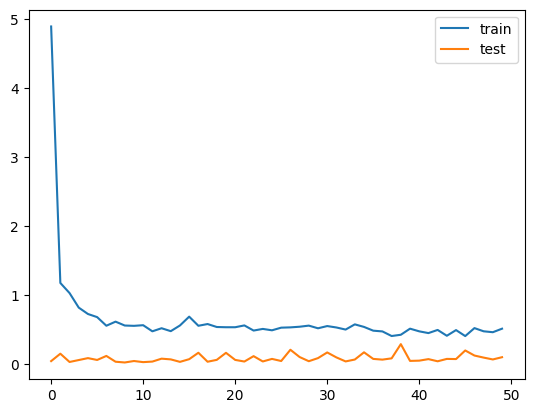

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


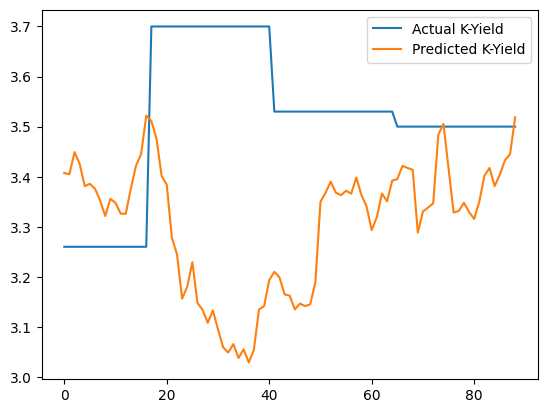

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

# Load environmental and yield data
env_data_2022 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2022_final.csv')
env_data_2023 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2023_final.csv')

# Load Desagri yield data from the .xls file
desagri = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\desagri.csv')  # Replace with your file path


# Merge dataframes on 'district' and date features
# Ensure your monthly data has columns 'district', 'date' and other environmental factors
env_data = pd.concat([env_data_2022, env_data_2023], axis=0)
env_data['date'] = pd.to_datetime(env_data['date'], format='mixed')

# Combine environmental data with Desagri data based on district
# We'll assume we predict K-Yield (Kharif Yield) as an example here
combined_data = pd.merge(env_data, desagri, on='district')

# Data Preprocessing
# Drop unnecessary columns and scale environmental features
features = combined_data.drop(['district', 'date', 'uid',  'geometry', 'centroid', 'year', 'K-Area (Hectare)', 'R-Area (Hectare)','K-Production (Tonnes)','R-Production (Tonnes)', 'K-Yield (Tonne/Hectare)', 'R-Yield (Tonne/Hectare)'], axis=1)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Prepare the dataset for time series (using a sliding window approach)
def create_dataset(features, labels, time_steps=12):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i+time_steps])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

# Use Kharif yield as the target
X, y = create_dataset(scaled_features, combined_data['K-Yield (Tonne/Hectare)'].values, time_steps=12)

# Ensure X is 3D with shape (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], features.shape[1]))  # Adjusting X to have 3 dimensions

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the CNN-RNN Model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))

# RNN layers (SimpleRNN instead of LSTM)
model.add(SimpleRNN(64, return_sequences=False))

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))  # Predicting K-Yield

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plotting the Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Predictions
predictions = model.predict(X_test)

# Plot Actual vs Predicted K-Yield
plt.plot(y_test, label='Actual K-Yield')
plt.plot(predictions, label='Predicted K-Yield')
plt.legend()
plt.show()


C:\Users\anves\AppData\Local\Temp\ipykernel_3784\3653929545.py:10: DtypeWarning: Columns (0,1,3,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  env_data_2022 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2022_final.csv')
C:\Users\anves\AppData\Local\Temp\ipykernel_3784\3653929545.py:11: DtypeWarning: Columns (0,1,3,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  env_data_2023 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2023_final.csv')


Epoch 1/100


C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.7446 - mae: 1.3170 - val_loss: 0.4518 - val_mae: 0.6428
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6746 - mae: 0.6611 - val_loss: 0.2501 - val_mae: 0.4649
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5238 - mae: 0.5795 - val_loss: 0.1801 - val_mae: 0.3705
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4732 - mae: 0.5606 - val_loss: 0.1491 - val_mae: 0.3237
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4489 - mae: 0.5396 - val_loss: 0.0874 - val_mae: 0.2180
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4460 - mae: 0.5453 - val_loss: 0.1326 - val_mae: 0.3041
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4442 - mae: 0.5262 - val_loss: 0.5713 - val_mae: 0.7279
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3831 - mae: 0.4727 - val_loss: 0.1394 - val_mae: 0.3044
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3674 - mae: 0.

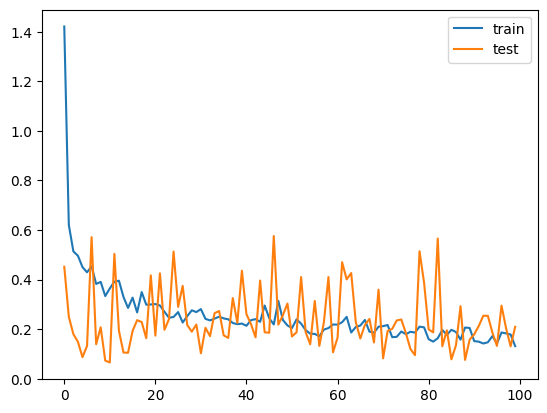

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000239FDE91240> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


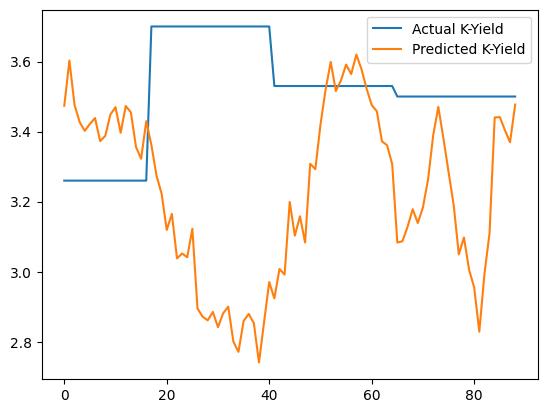

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

# Load environmental and yield data
env_data_2022 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2022_final.csv')
env_data_2023 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2023_final.csv')

# Load Desagri yield data from the .xls file
desagri = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\desagri.csv')  # Replace with your file path


# Merge dataframes on 'district' and date features
# Ensure your monthly data has columns 'district', 'date' and other environmental factors
env_data = pd.concat([env_data_2022, env_data_2023], axis=0)
env_data['date'] = pd.to_datetime(env_data['date'], format='mixed')

# Combine environmental data with Desagri data based on district
# We'll assume we predict K-Yield (Kharif Yield) as an example here
combined_data = pd.merge(env_data, desagri, on='district')

# Data Preprocessing
# Drop unnecessary columns and scale environmental features
features = combined_data.drop(['district', 'date', 'uid',  'geometry', 'centroid', 'year', 'K-Area (Hectare)', 'R-Area (Hectare)','K-Production (Tonnes)','R-Production (Tonnes)', 'K-Yield (Tonne/Hectare)', 'R-Yield (Tonne/Hectare)'], axis=1)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Prepare the dataset for time series (using a sliding window approach)
def create_dataset(features, labels, time_steps=12):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i+time_steps])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

# Use Kharif yield as the target
X, y = create_dataset(scaled_features, combined_data['K-Yield (Tonne/Hectare)'].values, time_steps=12)

# Ensure X is 3D with shape (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], features.shape[1]))  # Adjusting X to have 3 dimensions

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the CNN-RNN Model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))

# RNN layers (SimpleRNN instead of LSTM)
model.add(SimpleRNN(128, return_sequences=False))
model.add(Dropout(0.3))

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))  # Predicting K-Yield

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Plotting the Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Predictions
predictions = model.predict(X_test)

# Plot Actual vs Predicted K-Yield
plt.plot(y_test, label='Actual K-Yield')
plt.plot(predictions, label='Predicted K-Yield')
plt.legend()
plt.show()


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

# Load environmental and yield data
env_data_2022 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2022_final.csv')
env_data_2023 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2023_final.csv')

# Load Desagri yield data from the .xls file
desagri = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\desagri.csv')  # Replace with your file path


# Merge dataframes on 'district' and date features
# Ensure your monthly data has columns 'district', 'date' and other environmental factors
env_data = pd.concat([env_data_2022, env_data_2023], axis=0)
env_data['date'] = pd.to_datetime(env_data['date'], format='mixed')

# Combine environmental data with Desagri data based on district
# We'll assume we predict K-Yield (Kharif Yield) as an example here
combined_data = pd.merge(env_data, desagri, on='district')

# Data Preprocessing
# Drop unnecessary columns and scale environmental features
features = combined_data.drop(['district', 'date', 'uid',  'geometry', 'centroid', 'year', 'K-Area (Hectare)', 'R-Area (Hectare)','K-Production (Tonnes)','R-Production (Tonnes)', 'K-Yield (Tonne/Hectare)', 'R-Yield (Tonne/Hectare)'], axis=1)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Prepare the dataset for time series (using a sliding window approach)
def create_dataset(features, labels, time_steps=12):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i+time_steps])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

# Use Kharif yield as the target
X, y = create_dataset(scaled_features, combined_data['K-Yield (Tonne/Hectare)'].values, time_steps=12)

# Ensure X is 3D with shape (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], features.shape[1]))  # Adjusting X to have 3 dimensions

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the CNN-RNN Model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))

# RNN layers (SimpleRNN instead of LSTM)
model.add(SimpleRNN(64, return_sequences=False))

# Dense layers (for both K-Yield and R-Yield)
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2))  # Predicting both K-Yield and R-Yield

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plotting the Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Predictions
predictions = model.predict(X_test)

# Plot Actual vs Predicted K-Yield
plt.plot(y_test, label='Actual K-Yield')
plt.plot(predictions, label='Predicted K-Yield')
plt.legend()
plt.show()


C:\Users\anves\AppData\Local\Temp\ipykernel_3784\2287175191.py:10: DtypeWarning: Columns (0,1,3,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  env_data_2022 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2022_final.csv')
C:\Users\anves\AppData\Local\Temp\ipykernel_3784\2287175191.py:11: DtypeWarning: Columns (0,1,3,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  env_data_2023 = pd.read_csv('C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2023_final.csv')


Epoch 1/50


C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


InvalidArgumentError: Graph execution error:

Detected at node gradient_tape/compile_loss/mean_squared_error/sub/BroadcastGradientArgs defined at (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 196, in _run_module_as_main

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 86, in _run_code

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 603, in run_forever

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 1909, in _run_once

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\anves\AppData\Local\Temp\ipykernel_3784\2287175191.py", line 67, in <module>

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\backend\tensorflow\trainer.py", line 329, in fit

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\backend\tensorflow\trainer.py", line 122, in one_step_on_iterator

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\backend\tensorflow\trainer.py", line 110, in one_step_on_data

  File "C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\backend\tensorflow\trainer.py", line 72, in train_step

Incompatible shapes: [32] vs. [32,2]
	 [[{{node gradient_tape/compile_loss/mean_squared_error/sub/BroadcastGradientArgs}}]] [Op:__inference_one_step_on_iterator_10378]

In [33]:
%pip install feature_engine

     ---------------------------------------- 0.0/364.1 kB ? eta -:--:--
     ------------- ------------------------ 133.1/364.1 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 364.1/364.1 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
     --- ------------------------------------ 1.0/11.6 MB 32.7 MB/s eta 0:00:01
     --------- ------------------------------ 2.8/11.6 MB 35.4 MB/s eta 0:00:01
     -------------- ------------------------- 4.1/11.6 MB 37.3 MB/s eta 0:00:01
     ------------------- -------------------- 5.6/11.6 MB 32.7 MB/s eta 0:00:01
     ---------------------- ----------------- 6.5/11.6 MB 29.6 MB/s eta 0:00:01
     ------------------------ --------------- 7.0/11.6 MB 26.3 MB/s eta 0:00:01
     -------------------------- ------------- 7.7/11.6 MB 24.6 MB/s eta 0:00:01
     ---------------------------- ----------- 8.3/11.6 MB 23.0 MB/s eta 0:00:01
     ------------------------------ --------- 8.7/11.6 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\anves\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: C:\Users\anves\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\anves\AppData\Local\Temp\ipykernel_3784\2901035324.py:2: DtypeWarning: Columns (0,1,3,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  env_data_2022 = pd.read_csv(r'C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2022_final.csv')
C:\Users\anves\AppData\Local\Temp\ipykernel_3784\2901035324.py:3: DtypeWarning: Columns (0,1,3,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  env_data_2023 = pd.read_csv(r'C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2023_final.csv')


Epoch 1/50


C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.7102 - mae: 1.2665 - val_loss: 0.2052 - val_mae: 0.4171
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4603 - mae: 0.5586 - val_loss: 0.0428 - val_mae: 0.1808
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3787 - mae: 0.4937 - val_loss: 0.1790 - val_mae: 0.3773
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3539 - mae: 0.4667 - val_loss: 0.0886 - val_mae: 0.2649
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3244 - mae: 0.4448 - val_loss: 0.1685 - val_mae: 0.3525
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3453 - mae: 0.4745 - val_loss: 0.2235 - val_mae: 0.4279
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3185 - mae: 0.4449 - val_loss: 0.1461 - val_mae: 0.3257
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3202 - mae: 0.4578 - val_loss: 0.0848 - val_mae: 0.2206
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2205 - mae: 0.3661 - v

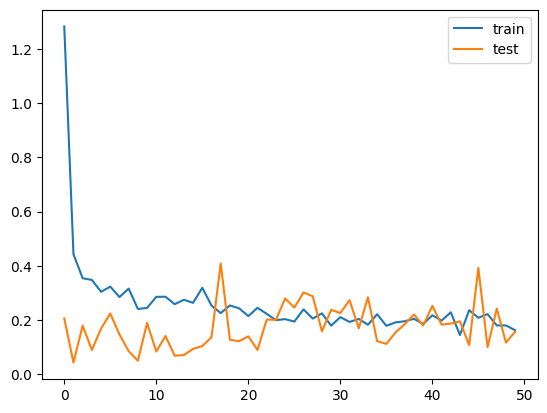

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


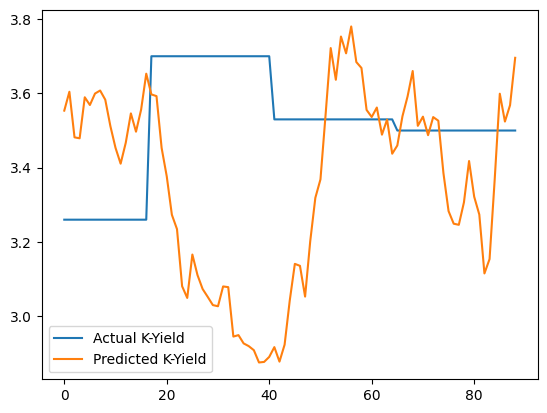

In [32]:
# Load environmental and yield data
env_data_2022 = pd.read_csv(r'C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2022_final.csv')
env_data_2023 = pd.read_csv(r'C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2023_final.csv')

# Load Desagri yield data from the .xls file
desagri = pd.read_csv(r'C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\desagri.csv')

# Merge dataframes on 'district' and date features
env_data = pd.concat([env_data_2022, env_data_2023], axis=0)
env_data['date'] = pd.to_datetime(env_data['date'], format='mixed')

# Create cyclic features for month and day
env_data['month'] = env_data['date'].dt.month
env_data['day'] = env_data['date'].dt.day

# Apply cyclic transformation
env_data['month_sin'] = np.sin(2 * np.pi * env_data['month'] / 12)
env_data['month_cos'] = np.cos(2 * np.pi * env_data['month'] / 12)
env_data['day_sin'] = np.sin(2 * np.pi * env_data['day'] / 31)  # Assuming max 31 days
env_data['day_cos'] = np.cos(2 * np.pi * env_data['day'] / 31)

# Combine environmental data with Desagri data based on district
combined_data = pd.merge(env_data, desagri, on='district')

# Data Preprocessing
# Drop unnecessary columns and scale environmental features
features = combined_data.drop(['district', 'date', 'uid', 'geometry', 'centroid', 'year', 'K-Area (Hectare)', 'R-Area (Hectare)',
                               'K-Production (Tonnes)', 'R-Production (Tonnes)', 'K-Yield (Tonne/Hectare)', 'R-Yield (Tonne/Hectare)'], axis=1)

# Include the new cyclic features
features = features.drop(['month', 'day'], axis=1)  # Drop original month and day if necessary

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Prepare the dataset for time series (using a sliding window approach)
def create_dataset(features, labels, time_steps=12):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i+time_steps])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

# Use Kharif yield as the target
X, y = create_dataset(scaled_features, combined_data['K-Yield (Tonne/Hectare)'].values, time_steps=12)

# Ensure X is 3D with shape (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], features.shape[1]))  # Adjusting X to have 3 dimensions

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the CNN-RNN Model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))

# RNN layers (SimpleRNN instead of LSTM)
model.add(SimpleRNN(128, return_sequences=False))
# model.add(Dropout(0.3))

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))  # Predicting K-Yield

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Plotting the Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Predictions
predictions = model.predict(X_test)

# Plot Actual vs Predicted K-Yield
plt.plot(y_test, label='Actual K-Yield')
plt.plot(predictions, label='Predicted K-Yield')
plt.legend()
plt.show()


In [40]:
%pip install feature_engine

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt
from feature_engine.creation import CyclicalFeatures

# Load environmental and yield data
env_data_2022 = pd.read_csv(r'C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2022_final.csv')
env_data_2023 = pd.read_csv(r'C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\DICRA\Combined\DICRA_2023_final.csv')

# Load Desagri yield data from the .xls file
desagri = pd.read_csv(r'C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code-review2\preprocessed_files\desagri.csv')

# Merge dataframes on 'district' and date features
env_data = pd.concat([env_data_2022, env_data_2023], axis=0)
env_data['date'] = pd.to_datetime(env_data['date'], format='mixed')

# Create month and day columns
env_data['month'] = env_data['date'].dt.month
env_data['day'] = env_data['date'].dt.day

# Use CyclicalFeatures to transform month and day
cyclical_transformer = CyclicalFeatures(variables=['month', 'day'], 
                                        period=[12, 31],  # Month has 12 periods, Day has up to 31
                                        drop_original=True)  # Drop the original month and day columns
env_data = cyclical_transformer.fit_transform(env_data)

# Combine environmental data with Desagri data based on district
combined_data = pd.merge(env_data, desagri, on='district')

# Data Preprocessing
# Drop unnecessary columns and scale environmental features
features = combined_data.drop(['district', 'date', 'uid', 'geometry', 'centroid', 'year', 
                               'K-Area (Hectare)', 'R-Area (Hectare)', 'K-Production (Tonnes)', 
                               'R-Production (Tonnes)', 'K-Yield (Tonne/Hectare)', 
                               'R-Yield (Tonne/Hectare)'], axis=1)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Prepare the dataset for time series (using a sliding window approach)
def create_dataset(features, labels, time_steps=12):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i+time_steps])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

# Use Kharif yield as the target
X, y = create_dataset(scaled_features, combined_data['K-Yield (Tonne/Hectare)'].values, time_steps=12)

# Ensure X is 3D with shape (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], features.shape[1]))  # Adjusting X to have 3 dimensions

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the CNN-RNN Model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))

# RNN layers (SimpleRNN instead of LSTM)
model.add(SimpleRNN(128, return_sequences=False))
model.add(Dropout(0.3))

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))  # Predicting K-Yield

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Plotting the Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Predictions
predictions = model.predict(X_test)

# Plot Actual vs Predicted K-Yield
plt.plot(y_test, label='Actual K-Yield')
plt.plot(predictions, label='Predicted K-Yield')
plt.legend()
plt.show()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: C:\Users\anves\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


ImportError: cannot import name '_to_object_array' from 'sklearn.utils.validation' (C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py)

In [38]:
%pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: C:\Users\anves\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
